# Part 1: Prepare the Data

In [1]:
import pandas as pd

# Read myopia.csv into a pandas dataframe
df = pd.DataFrame(pd.read_csv('myopia.csv'))
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [2]:
# Remove the target "MYOPIC" column from the dataset
labels = df['MYOPIC']
df2 = df.drop('MYOPIC', axis = 1)


In [3]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2)

# Part 2: Apply Dimensionality Reduction

In [4]:
from sklearn.decomposition import PCA

# state the desired explained variance
pca = PCA(n_components=0.9)

In [5]:
myopia_pca = pca.fit_transform(scaled_features)

In [8]:
# Run t-SNE on the principle components
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 250)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [9]:
tsne_features.shape

(618, 2)

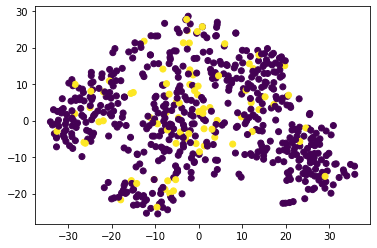

In [11]:
# Create a scatter plot of the t-SNE output
import matplotlib.pyplot as plt

df2['x'] = tsne_features[:,0]
df2['y'] = tsne_features[:,1]
plt.scatter(df2['x'], df2['y'], c=labels)
plt.show()

There are no distinct clusters from the t-SNE plot. 

# Part 3: Perform a Cluster Analysis with K-means

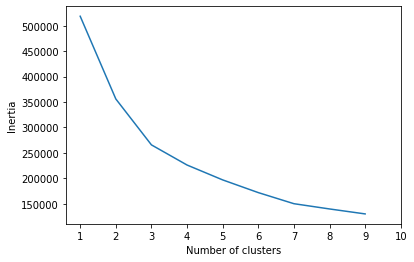

In [12]:
from sklearn.cluster import KMeans

# Create an elbow plot to identify the best number of clusters.
# Use a for loop to determine the inertia for each k between 1 through 10
# Determine where the elbow of the plot is, and at which value of k it appears

inertia = []
k = list(range(1, 10))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


k = 6 seems to be the elbow of the plot.

In [24]:
model = KMeans(n_clusters=6, random_state=0)

 # Train the model
model.fit(df2)

predictions = model.predict(df2)

df2["predicted"] = model.labels_


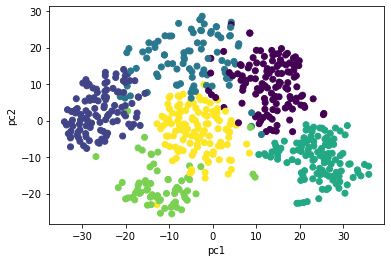

In [25]:

plt.scatter(df2['x'], df2['y'], c=df2['predicted'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# Part 4: Make a Recommendation
The patients can be clustered into 6 groups. The data needs to be standardized first, and then using principal component analysis to reduce dimensionality. Finaly, using K-means to find clusters of different patients. 